In [1]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mtcnn import MTCNN
from PIL import Image

## Function

In [40]:
def copy_image_to_new_folder(images, list_name, folder_name):
    '''
    This function copies images from one folder to a new folder that is created in this function.

    Parameter: 
        images - list of images
        list_name - name of the new folder
        folder_name - name of the folder you want to copy the images from
        
    Returns: newly created folders with copied images
    '''
    
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [41]:
def plot_ages(df):
    '''
    This function takes in dataframe and plots histogram of the age range.

    Parameter: dataframe of the label with AgeRange

    returns: plots histogram of the AgeRange
    '''
    
    fig, ax = plt.subplots(figsize=(15,10))
    df['AgeRange'].sort_values().hist(bins='auto', edgecolor='black')
    ax.grid(False)
    ax.set_xlabel('Age')
    ax.set_ylabel('Counts');

In [42]:
def split_images(df, imgs, directory):
    '''
    Finds images for each class, create new folder for each class, and copy the images to the correct classes

    Parameter: 
        df - DataFrame of the labels
        imgs - list of images' names
        directory - directory of the folder you want the classes' folders to be in 

    Returns: new folders are created with the correct images in them
    '''
    
    # Get indexes of each age bins
    age_0_20_index = list(df[df['AgeRange'] == '0-20'].index)
    age_21_26_index = list(df[df['AgeRange'] == '21-26'].index)
    age_27_35_index = list(df[df['AgeRange'] == '27-35'].index)
    age_36_50_index = list(df[df['AgeRange'] == '36-50'].index)
    age_51_up_index = list(df[df['AgeRange'] == '51+'].index)

    # With the list of indexes for each classes, we need to get the images with the indexes for each class
    age_0_20_imgs = [imgs[index] for index in age_0_20_index]
    age_21_26_imgs = [imgs[index] for index in age_21_26_index]
    age_27_35_imgs = [imgs[index] for index in age_27_35_index]
    age_36_50_imgs = [imgs[index] for index in age_36_50_index]
    age_51_up_imgs = [imgs[index] for index in age_51_up_index]

    # By using the function, we want to copy the images to the correct class folder
    copy_image_to_new_folder(age_0_20_imgs, 'age_0_20_imgs', directory)
    copy_image_to_new_folder(age_21_26_imgs, 'age_21_26_imgs', directory)
    copy_image_to_new_folder(age_27_35_imgs, 'age_27_35_imgs', directory)
    copy_image_to_new_folder(age_36_50_imgs, 'age_36_50_imgs', directory)
    copy_image_to_new_folder(age_51_up_imgs, 'age_51_up_imgs', directory)

In [28]:
def extract_face(filenames, directory, new_directory):
	'''
	Crops faces from the pictures.

	Parameter:
		filenames - list of images' names
		directory - directory of the original images
		new_directory - directory of the new folder to save the cropped images

	Returns: Saves cropped images to the new folder
	'''
	
	for filename in filenames:
		pixels = plt.imread(directory+filename)
		
		if len(pixels.shape) == 3 and pixels.shape[2] == 3:

			detector = MTCNN()

			results = detector.detect_faces(pixels)

			if results == []:
					origin = os.path.join(directory, filename)
					destination = os.path.join(new_directory, filename)
					shutil.copyfile(origin, destination)

			else:
				x1, y1, width, height = results[0]['box']
				x2, y2 = x1 + width, y1 + height

				face = pixels[y1:y2, x1:x2]

				image = Image.fromarray(face)
				
				image.save(new_directory+filename)

		else:
			origin = os.path.join(directory, filename)
			destination = os.path.join(new_directory, filename)
			shutil.copyfile(origin, destination)


To download the images, we go to https://susanqq.github.io/UTKFace/ this website. From the website, download the three folders (part1, part2, part3) and unzip them.
I put the three folders in a folder called 'Human_Face_Regonition_Images' and will be working in that folder to process these images.

When the images were downloaded, there was a file that wasn't a .jpg file. Hence, we will delete the file named '.DS_store'

In [ ]:
!find . -name ".DS_Store" -delete

First, we are going to make directories for the folders with the images that we downloaded.

In [6]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_2_dir = os.path.join(img_dir, 'part2')
part_3_dir = os.path.join(img_dir, 'part3')

Let's check if the paths were created correctly.

In [7]:
part_1_dir

'Human_Face_Regonition_Images\\part1'

With the directories, we want to make our images be in one folder. 
To do so, we must make a directory of the new folder we want the images to be in.

In [21]:
img_dir = 'Human_Face_Regonition_Images\\images'
os.mkdir(img_dir)

Then, we must get all the files ending with .jpg from each folders (part1, part2, part3) and copy them to the new folder using the directory path we created above.

In the folder part3, we found that there are two images with the wrong extensions. So, before we move the images in part3 folder to the new folder, we need to rename the images first.

In [22]:
imgs_1= [file for file in os.listdir(part_1_dir) if file.endswith('.jpg')]

for img in imgs_1:
    origin = os.path.join(part_1_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

imgs_2= [file for file in os.listdir(part_2_dir) if file.endswith('.jpg')]

for img in imgs_2:
    origin = os.path.join(part_2_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

os.rename(part_3_dir+'\\'+'44_1_4_20170116235150272.pg', part_3_dir+'\\'+'44_1_4_20170116235150272.jpg')
os.rename(part_3_dir+'\\'+'55_0_0_20170116232725357jpg', part_3_dir+'\\'+'55_0_0_20170116232725357.jpg')

imgs_3= [file for file in os.listdir(part_3_dir) if file.endswith('.jpg')]

for img in imgs_3:
    origin = os.path.join(part_3_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

Let's check if the number of images in the new folder matches the sum of the numbers of the three folders.

In [ ]:
len(os.listdir(img_dir)) == len(os.listdir(part_1_dir)) + len(os.listdir(part_2_dir)) + len(os.listdir(part_3_dir)) - 1

True

Let's visualize some images in our folder.

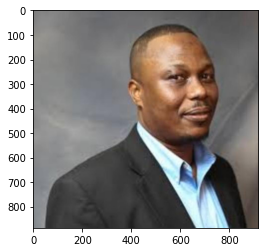

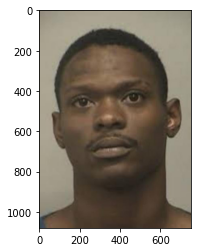

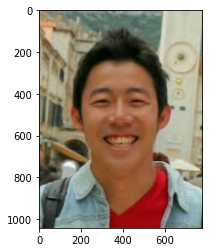

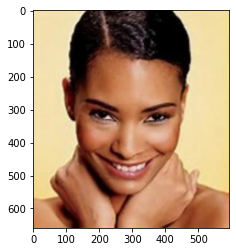

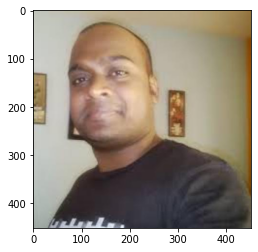

In [29]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

imgs = [mpimg.imread(total_imgs_dir+img) for img in random.sample(total_imgs, 3)]

for n in range(3):
    plt.imshow(imgs[n])
    plt.show()

We can create a dataframe of the ages to understand the distributions of the ages in our data.

In [2]:
img_dir = 'Human_Face_Regonition_Images\\images\\'
ages = [name.split('_')[0] for name in os.listdir(img_dir)]
labels = pd.DataFrame({'age' : ages})
labels.head()

,age
0,100
1,100
2,100
3,100
4,100


In [3]:
labels['age'] = labels['age'].astype(int)

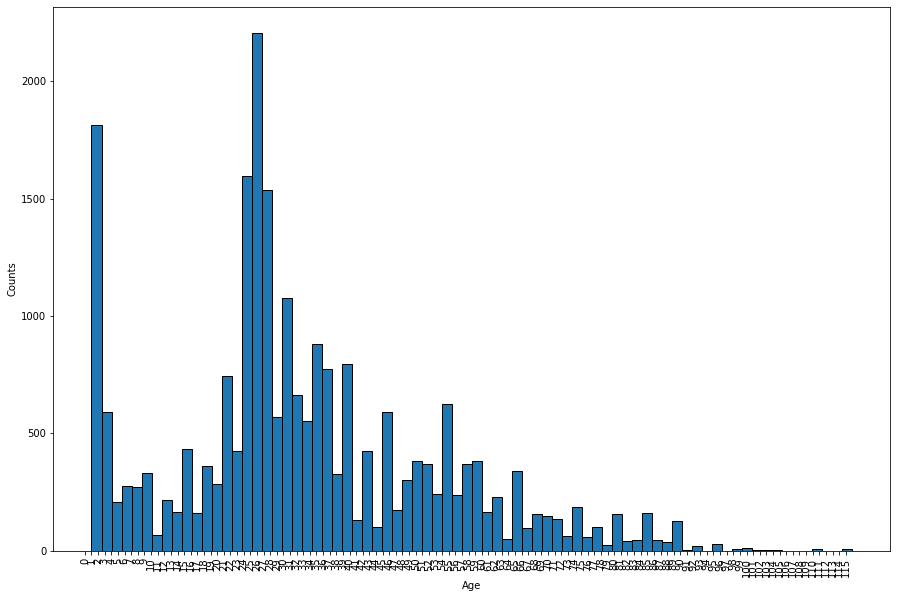

In [32]:
labels = labels.sort_values(by='age')
fig, ax = plt.subplots(figsize=(15,10))
labels['age'].hist(bins='auto', edgecolor='black')
ax.xaxis.set_ticks(np.arange(0, 116, 1))
ax.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.xticks(rotation = 90);

From the graph above, we can see that the distribution of ages are very imbalanced and skewed. 

Let's see how the distribution of the images are when we binned them in certain way.

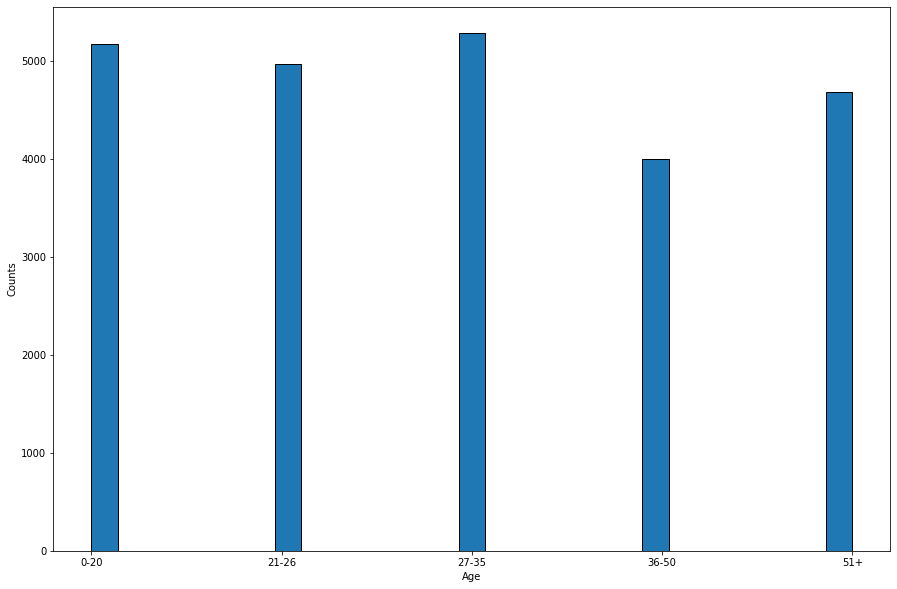

In [4]:
bins = [0, 20, 26, 35, 50, np.inf]
names = ['0-20', '21-26', '27-35', '36-50', '51+']
labels['AgeRange'] = pd.cut(labels['age'], bins, labels=names)

fig, ax = plt.subplots(figsize=(15,10))
labels['AgeRange'].sort_values().hist(bins='auto', edgecolor='black')
ax.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Counts');

In [5]:
labels['AgeRange'].value_counts()

27-35    5284
0-20     5174
21-26    4973
51+      4678
36-50    3999
Name: AgeRange, dtype: int64

Since the images aren't only faces (some with full body, half body, and background),  we want to crop the photos to be just faces.

First, let's create a new folder for the cropped iamges.

In [29]:
cropped_dir = 'Human_Face_Regonition_Images\\cropped_images'
os.mkdir(cropped_dir)

In [7]:
cropped_dir

'Human_Face_Regonition_Images\\cropped_images'

Now, let's get all the images from the iamges folder.

In [5]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

With the function, we will save the cropped images to the new folder.

(This takes hours to complete, so do not run this code and download the folder with cropped faces [here](https://drive.google.com/file/d/1Hq-Lytp__3Rqfa-OhakjTXssuVlEP5-v/view?usp=sharing))

In [30]:
extract_face(total_imgs, total_imgs_dir, cropped_dir+'\\')

From the folders with all the images, we want to split out images to 3 different folders for modeling: train, validation, test.

In [31]:
img_dir = 'Human_Face_Regonition_Images\\'

# Split Folder
split_dir = os.path.join(img_dir, 'split2')
os.mkdir(split_dir)

# Train Folder
train_dir = os.path.join(split_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(split_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(split_dir, 'test')
os.mkdir(test_dir)

We want to take 16,000 images into train folder, 5,000 images to validation folder, and 3,108 images to test folder. Because of the way how this file name is, we want to take random images.

In [32]:
total_imgs_dir = 'Human_Face_Regonition_Images\\cropped_images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 16000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [33]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 5000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [34]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

With the three folders, I want to get the correct labels for each folder. To get the labels, I need to get the first digit of each image file. Then, I am going to make them into a dataframe.

In [35]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

train_labels.head()

,age
0,61
1,1
2,65
3,26
4,90


In [36]:
bins = [0, 20, 26, 35, 50, np.inf]
names = ['0-20', '21-26', '27-35', '36-50', '51+']

In [37]:
train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)
train_labels.head()

,age,AgeRange
0,61,51+
1,1,0-20
2,65,51+
3,26,21-26
4,90,51+


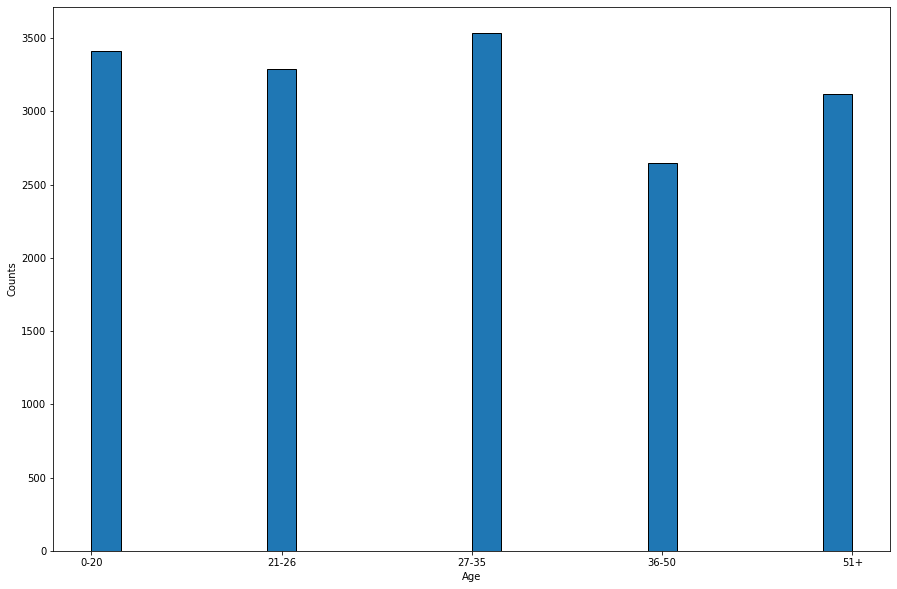

In [43]:
plot_ages(train_labels);

After binning the ages, we want to make separate folders for each classes. First, we need to get the indexes of each classes so that we can get the correct images for each class.

In [44]:
split_images(train_labels, train_imgs, train_dir)

Now  we do the same process for validation and test images.

In [45]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)
validation_labels.head()

,age,AgeRange
0,30,27-35
1,45,36-50
2,21,21-26
3,26,21-26
4,22,21-26


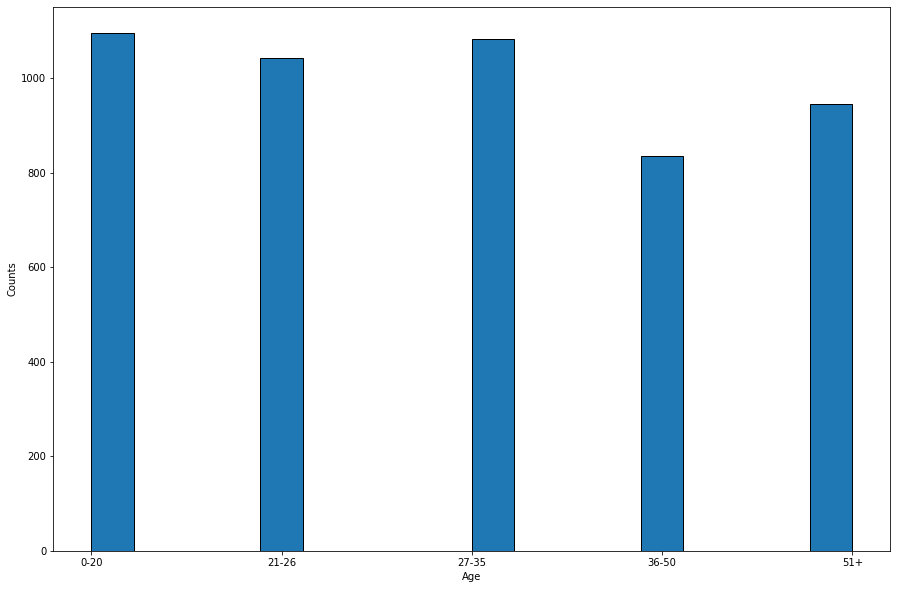

In [46]:
plot_ages(validation_labels);

The proportion of the age distributions is very similar to the training images.

In [47]:
split_images(validation_labels, validation_imgs, validation_dir)

In [48]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)
test_labels.head()

,age,AgeRange
0,100,51+
1,100,51+
2,100,51+
3,101,51+
4,101,51+


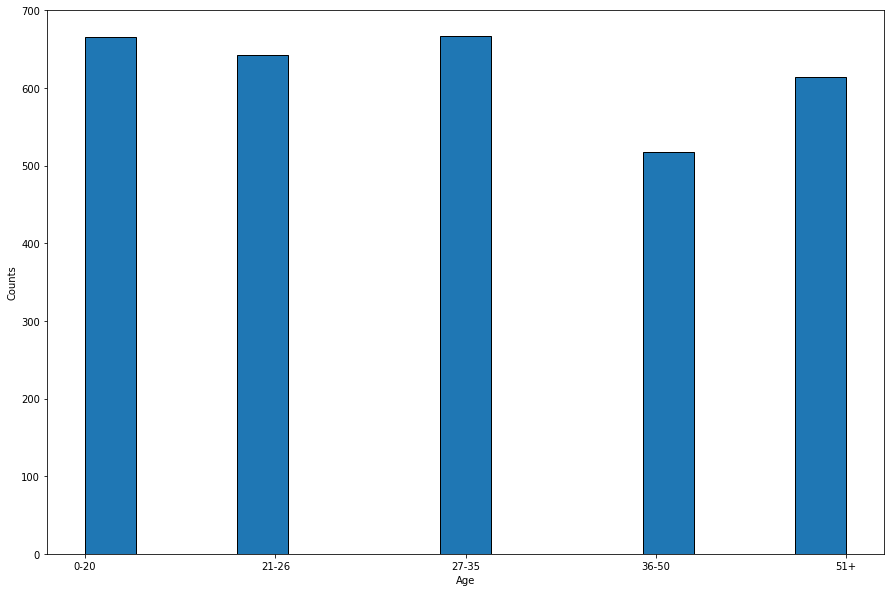

In [49]:
plot_ages(test_labels);

The proportion of the age distributions is very similar to the training images and the validation images.

In [50]:
split_images(test_labels, test_imgs, test_dir)

With the three models, I will iterate through multiple models in separate notebooks to find the model with the best score.